## Medical Insurance Cost Analysis Notebook
# This notebook performs data cleaning, Exploratory Data Analysis (EDA), and builds a Machine Learning model to predict insurance charges based on the provided dataset.
#
### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

### 2. Load the Data

In [3]:
df = pd.read_csv('/home/vyom/Documents/DS ML Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Data Cleaning
#### 3.1 Check for Missing Values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 3.2 Check for Duplicates

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
# If duplicates exist, remove them
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

#### 3.3 Data Types and Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
# Convert categorical variables to category type if needed
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

### 4. Exploratory Data Analysis (EDA)
#### 4.1 Summary Statistics

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### 4.2 Distribution of Numerical Features

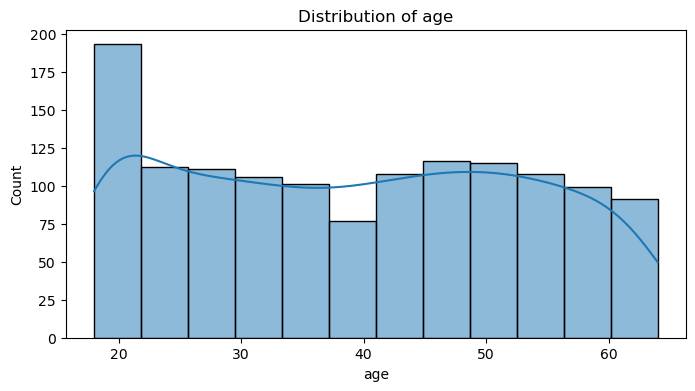

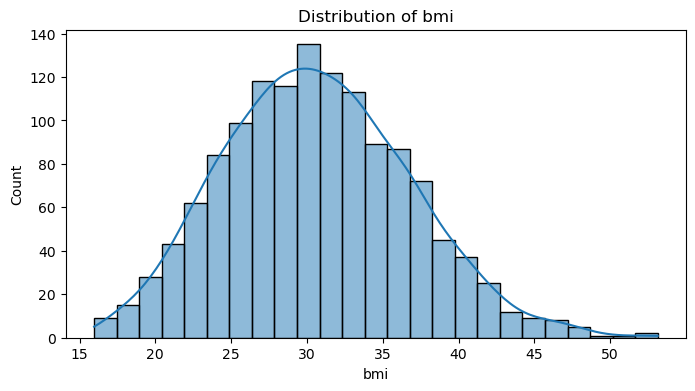

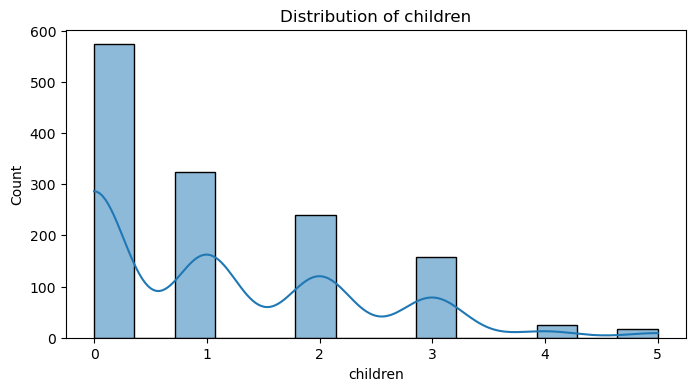

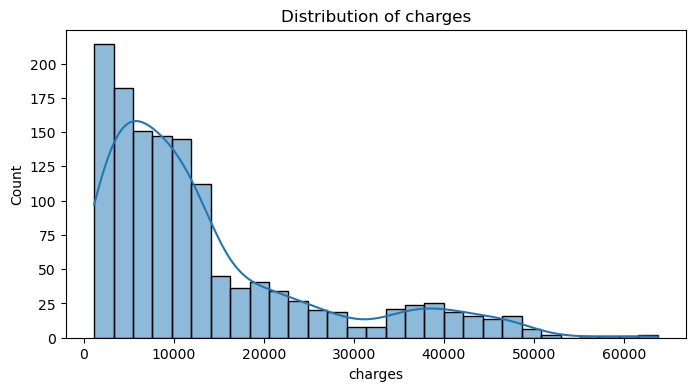

In [11]:
numerical_cols = ['age', 'bmi', 'children', 'charges']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### 4.3 Boxplots for Outliers and Relationships

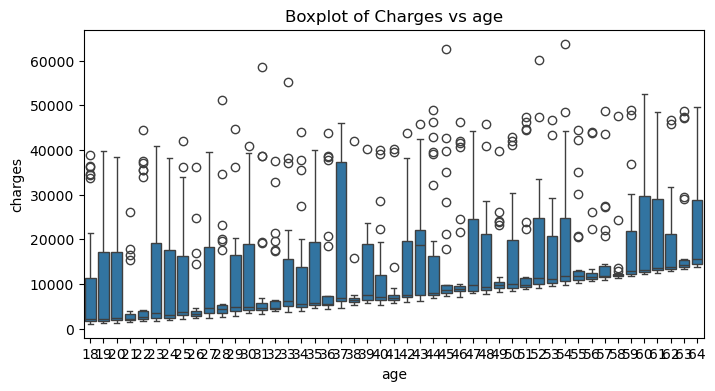

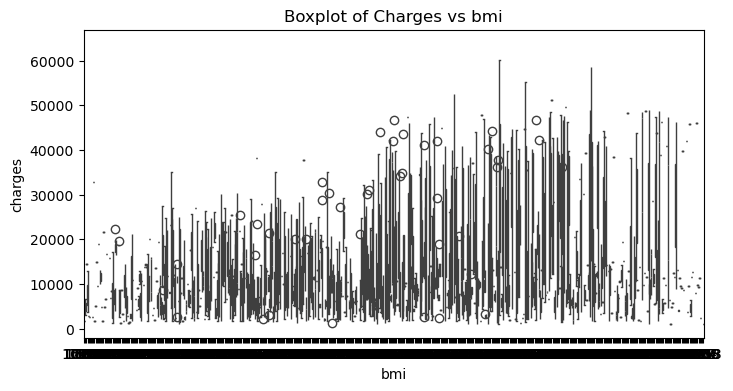

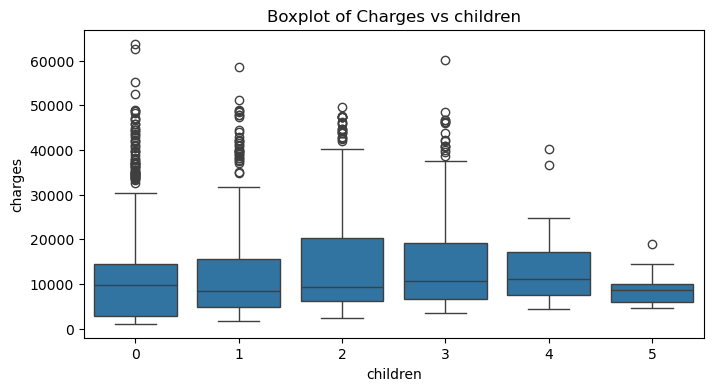

In [12]:
for col in numerical_cols:
    if col != 'charges':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], y=df['charges'])
        plt.title(f'Boxplot of Charges vs {col}')
        plt.show()

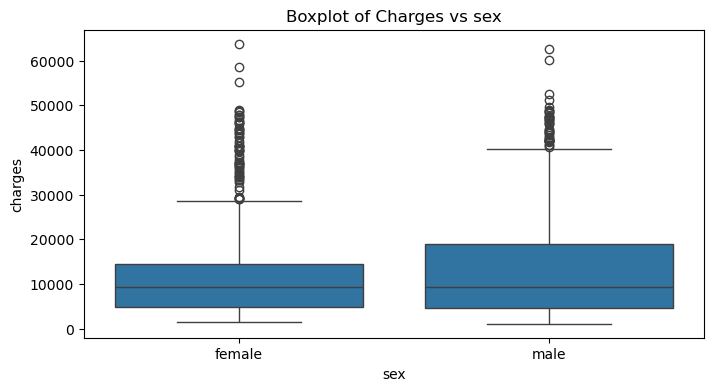

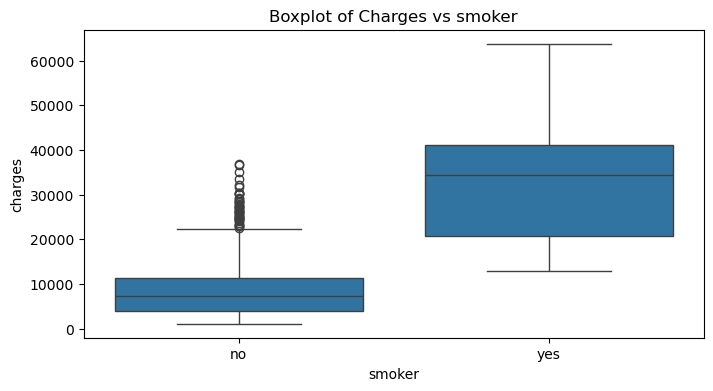

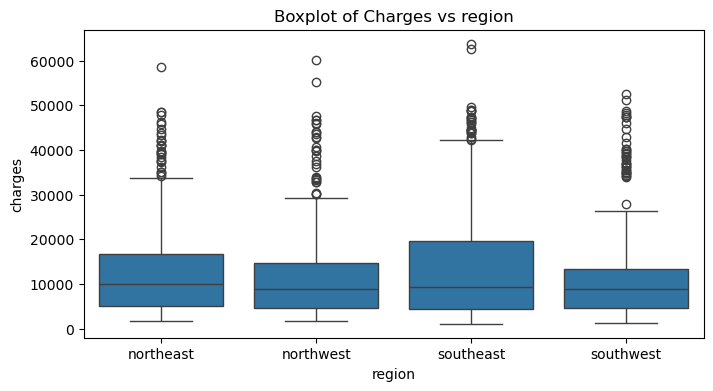

In [14]:
# Categorical vs Charges
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], y=df['charges'])
    plt.title(f'Boxplot of Charges vs {col}')
    plt.show()

#### 4.4 Correlation Matrix

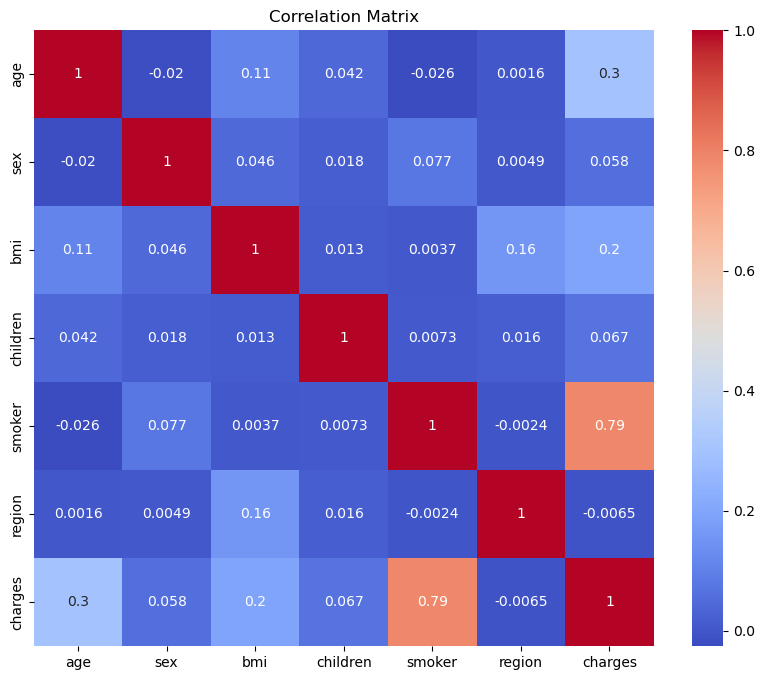

In [15]:
# Encode categoricals for correlation
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 4.5 Pairplot

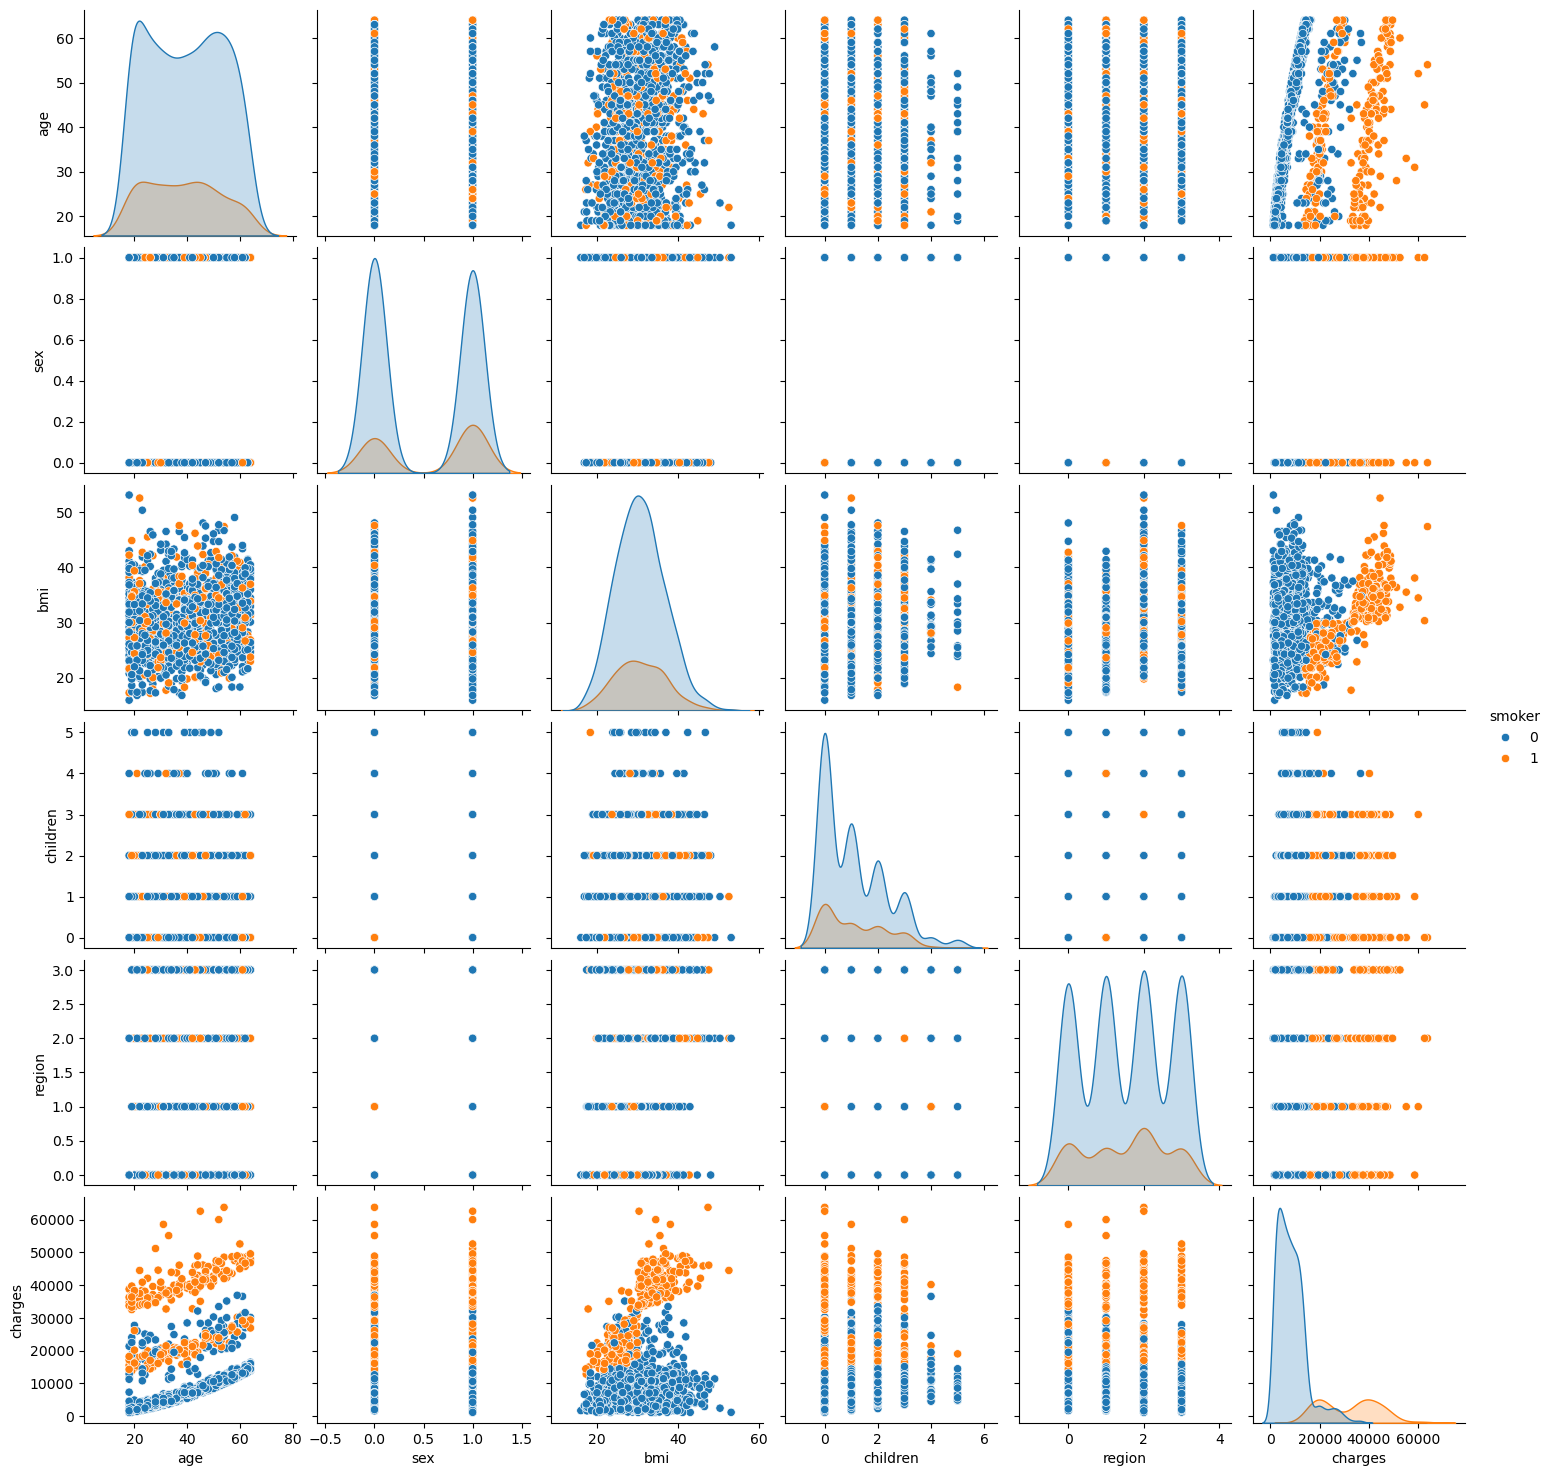

In [16]:
sns.pairplot(df_encoded, hue='smoker')
plt.show()

### 5. Machine Learning Model
# We'll build a simple Linear Regression and a Random Forest Regressor to predict 'charges'.
# 
#### 5.1 Preprocessing

In [19]:
# One-hot encode categorical variables
df_ml = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df_ml.drop('charges', axis=1)
y = df_ml['charges']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols[:-1]] = scaler.fit_transform(X[numerical_cols[:-1]])  # Exclude charges

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5.2 Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('Linear Regression:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression:
RMSE: 5956.342894363587
R2 Score: 0.8069287081198012


#### 5.3 Random Forest Regressor

In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('Random Forest:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest:
RMSE: 4713.964344436038
R2 Score: 0.879070876073814


#### 5.4 Feature Importance (from Random Forest)

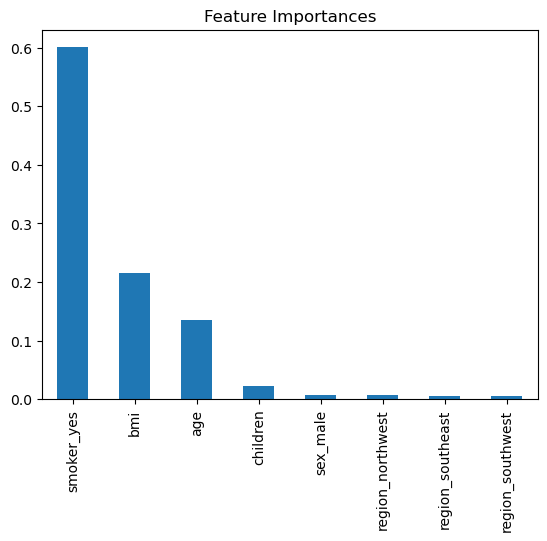

In [22]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

#### 5.5 Actual vs Predicted Plot

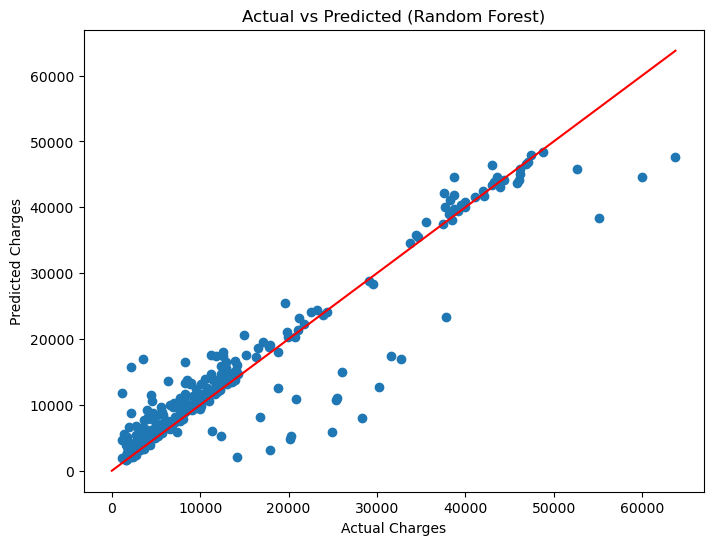

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()